In [14]:
import pandas as pd
import numpy as np
from scipy import stats as sps
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [8]:
tt=pd.read_csv('SH600000_tt.csv')

In [10]:
tt_time=tt['Time']

In [11]:
tt.drop(['Unnamed: 0','Time'],inplace=True,axis=1)

In [39]:
tt_y=tt['Close']

In [12]:
tt.head()

,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,MACD,day3Returnlag,MA3lag,Openlag,Highlag,Lowlag,Closelag,Close
0,-0.538217,0.916542,0.337054,0.863675,-0.974514,-1.040990,0.940411,0.880591,0.187386,0.527322,0.101676,0.720183,-0.960328,0.848923,0.876955,0.956274,0.940585,0.878767,154.8268
1,-0.230804,-0.151536,-1.374723,-0.264823,-1.677261,-1.097491,0.874857,0.870759,-1.397381,-0.317952,-2.348111,0.644545,-1.518285,0.695499,0.847370,0.744879,0.628751,0.526688,154.4560
2,-0.617253,-0.222715,-1.264034,-0.819867,-1.150201,-1.124140,0.773548,0.848507,-1.823302,-0.511085,-0.150762,0.539098,-1.685647,0.575347,0.529294,0.526195,0.576785,0.497351,153.1580
3,-0.760831,-0.465933,-1.342004,-1.418789,-1.492329,-1.139697,0.629032,0.812801,-1.435656,-0.741804,-0.662535,0.399544,-0.558632,0.408985,0.492313,0.431426,0.487685,0.394657,150.9330
4,-0.427463,-0.831753,-0.991970,-1.282261,-0.399385,-1.181007,0.496436,0.762090,-2.022409,-0.919522,-1.187307,0.249292,-1.254343,0.338742,0.396146,0.329376,0.198131,0.218621,151.3038


In [13]:
tt_df=tt.copy()

In [15]:
tt_df.shape

(404, 19)

In [37]:
oot=pd.read_csv('SH600000_oot.csv')

In [40]:
oot_y=oot['Close']

In [38]:
oot_time=oot['Time']

## SequentialFeatureSelector

In [20]:
feature=list(tt_df.keys()[:-1])

In [16]:
estimator=LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)

In [25]:
sfs = SFS(estimator,
           k_features=18,
           forward=True,
           verbose=1,
           scoring = 'neg_mean_squared_error',
           cv = 5,
           n_jobs=-1)

In [26]:
sfs.fit(tt_df[feature],tt_df['Close'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.6s finished
Features: 1/18[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
Features: 2/18[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
Features: 3/18[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
Features: 4/18[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished
Features: 5/18[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=-1,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=18, n_jobs=-1, pre_dispatch='2*n_jobs',
                          scoring='neg_mean_squared_error', verbose=1)

In [27]:
score_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
score_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[-1.171535317996101, -5.422852034512507, -1.50...",-2.86667,"(MA3lag,)",1.99787,1.55441,0.777207
2,"(6, 13)","[-0.5483535057009952, -2.4372644927446685, -0....",-1.7645,"(MA5lag, MA3lag)",1.08316,0.842739,0.42137
3,"(6, 8, 13)","[-0.3248180772704301, -1.4176502524975423, -0....",-1.04137,"(MA5lag, day5Returnlag, MA3lag)",0.646211,0.502774,0.251387
4,"(6, 8, 10, 13)","[-0.16640641411189175, -0.7666674192374213, -0...",-0.486102,"(MA5lag, day5Returnlag, PROClag, MA3lag)",0.26197,0.203821,0.101911
5,"(6, 8, 10, 12, 13)","[-0.14681876051617176, -0.6816369236703342, -0...",-0.452677,"(MA5lag, day5Returnlag, PROClag, day3Returnlag...",0.248452,0.193304,0.0966519
6,"(6, 8, 10, 12, 13, 17)","[-0.016849707952720155, -0.11786016818506379, ...",-0.169676,"(MA5lag, day5Returnlag, PROClag, day3Returnlag...",0.243419,0.189388,0.094694
7,"(3, 6, 8, 10, 12, 13, 17)","[-0.017662890886963246, -0.11681665863432397, ...",-0.169643,"(fastDlag, MA5lag, day5Returnlag, PROClag, day...",0.243113,0.18915,0.094575
8,"(3, 6, 7, 8, 10, 12, 13, 17)","[-0.019334858928493084, -0.1157097799942996, -...",-0.169066,"(fastDlag, MA5lag, MA15lag, day5Returnlag, PRO...",0.241833,0.188154,0.0940771
9,"(3, 6, 7, 8, 9, 10, 12, 13, 17)","[-0.017898991195479486, -0.11716042484771447, ...",-0.168118,"(fastDlag, MA5lag, MA15lag, day5Returnlag, day...",0.240524,0.187136,0.0935681
10,"(3, 6, 7, 8, 9, 10, 12, 13, 14, 17)","[-0.01642861183703766, -0.10643192261161726, -...",-0.168106,"(fastDlag, MA5lag, MA15lag, day5Returnlag, day...",0.241222,0.187679,0.0938396


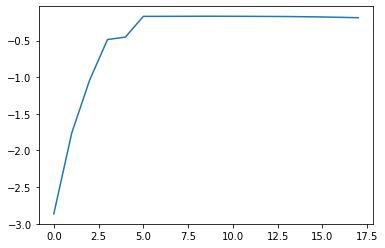

In [28]:
plt.figure()
plt.plot(range(18),score_df['avg_score'])
plt.show()

#### Based on the plot above, it looks like when the number of parameters is up to 7, the cross-validated performance of model won't improve any more. Therefore, we include 7 features in over model as below.

In [34]:
final_feature= list(score_df.loc[7,'feature_names'])

In [35]:
final_feature

['fastDlag',
 'MA5lag',
 'day5Returnlag',
 'PROClag',
 'day3Returnlag',
 'MA3lag',
 'Closelag']

In [41]:
tt_final=tt[final_feature]
oot_final=oot[final_feature]

In [ ]:
tt_final['Time']=tt_time
oot_final[]